In [45]:
# Import necessary libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, roc_auc_score
from src.model_utils import get_models
from src.feature_utils import log_transform, ordinal_encode, scale_features

df = pd.read_csv("Stars.csv")

In [47]:
# Plot Stylization

plt.style.use("dark_background")

COLORS = {
    "pink": "#ff4ecd",
    "blue": "#4ea8ff",
    "green": "#3dff9f",
    "purple": "#b36bff"
}

In [49]:
# Apply features

df_fe = log_transform(
    df,
    columns=["Temperature (K)", "Luminosity(L/Lo)", "Radius(R/Ro)"]
)

df_fe = ordinal_encode(df_fe)
df_fe.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3.486855,-2.619789,-0.769551,16.12,0,11,6
1,3.483159,-3.301029,-0.811916,16.60,0,11,6
2,3.414973,-3.522877,-0.991400,18.70,0,11,6
3,3.447158,-3.698968,-0.795880,16.65,0,11,6
4,3.287578,-3.860118,-0.987163,20.06,0,11,6


In [51]:
# Seperate Features from the Target

X = df_fe.drop("Star type", axis=1)
y = df_fe["Star type"]

X_scaled, scaler = scale_features(X)

In [53]:
# Fit and Compare

models = get_models()
preds = {}

for name, model in models.items():
    model.fit(X_scaled, y)
    preds[name] = model.predict(X_scaled)

agreement_df = pd.DataFrame(preds)
agreement_df.head()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,logistic_regression,knn,random_forest,svm
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [55]:
# Agreement Rate

agreement_rate = agreement_df.apply(
    lambda row: len(set(row)) == 1,
    axis=1
).mean()

agreement_rate

0.9791666666666666

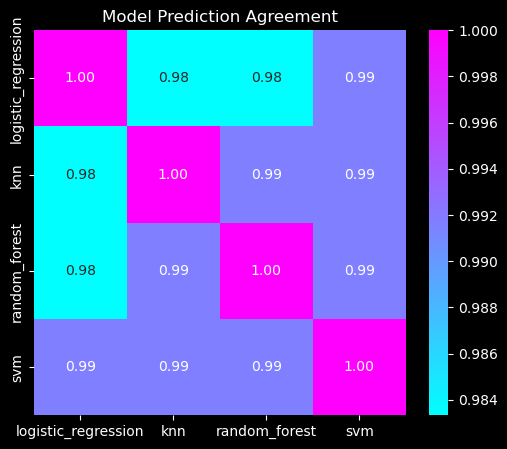

In [57]:
# Model Prediction Agreement

agreement_matrix = np.zeros((len(models), len(models)))
model_names = list(models.keys())

for i, m1 in enumerate(model_names):
    for j, m2 in enumerate(model_names):
        agreement_matrix[i, j] = np.mean(
            preds[m1] == preds[m2]
        )

fig, ax = plt.subplots(figsize=(6, 5))

sns.heatmap(
    agreement_matrix,
    xticklabels=model_names,
    yticklabels=model_names,
    cmap="cool",
    annot=True,
    fmt=".2f",
    ax=ax
)

ax.set_title("Model Prediction Agreement")
plt.show()